## Vest Data Analysis (larger dataset)

In [4]:
import os
import glob
import pandas as pd

# Get the root directory of the notebook
root_dir = os.getcwd()

# Create an empty DataFrame to store concatenated CSV data
combined_data = pd.DataFrame()

# Loop through the root directory
for filename in glob.iglob(root_dir + '/*.csv'):
    # Read each CSV file into a DataFrame
    df = pd.read_csv(filename)
    # Append the DataFrame to combined_data vertically
    combined_data = pd.concat([combined_data, df], axis=0)

# Display the combined DataFrame
print("Combined CSV data:")
print(combined_data)


Combined CSV data:
        time [s/256]  breathing_rate [rpm](/api/datatype/33/)  \
0       4.367425e+11                                     14.0   
1       4.367425e+11                                     14.0   
2       4.367425e+11                                     14.0   
3       4.367425e+11                                     14.0   
4       4.367425e+11                                     13.0   
...              ...                                      ...   
266463  4.381608e+11                                     19.0   
266464  4.381608e+11                                     19.0   
266465  4.381608e+11                                     19.0   
266466  4.381608e+11                                     21.0   
266467  4.381608e+11                                     22.0   

        minute_ventilation [mL/min](/api/datatype/36/)  \
0                                             19441.92   
1                                             19441.92   
2                         

In [9]:
# Assuming combined_data is the DataFrame containing the data

# List of columns to delete
columns_to_delete = [
    'Time [s/256]',
    'Respiration Rate (rpm)',
    'Breathing Volume (liters/min)',
    'Adjusted Breathing Volume (liters/min)',
    'Activity (g)',
    'Heart Rate (bpm)',
    'Stress Levels'
]

# Drop the specified columns
combined_data.drop(columns=columns_to_delete, inplace=True)

# Print the updated DataFrame
print(combined_data)


        time [s/256]  breathing_rate [rpm](/api/datatype/33/)  \
0       4.367425e+11                                     14.0   
1       4.367425e+11                                     14.0   
2       4.367425e+11                                     14.0   
3       4.367425e+11                                     14.0   
4       4.367425e+11                                     13.0   
...              ...                                      ...   
266463  4.381608e+11                                     19.0   
266464  4.381608e+11                                     19.0   
266465  4.381608e+11                                     19.0   
266466  4.381608e+11                                     21.0   
266467  4.381608e+11                                     22.0   

        minute_ventilation [mL/min](/api/datatype/36/)  \
0                                             19441.92   
1                                             19441.92   
2                                            

In [10]:
# Count the number of NaN values in the DataFrame
nan_count = combined_data.isna().sum().sum()
print("Number of NaN values in the DataFrame:", nan_count)


Number of NaN values in the DataFrame: 7282490


In [11]:
# Remove NaN values from the DataFrame
combined_data.dropna(inplace=True)

# Print the DataFrame after removing NaN values
print("DataFrame after removing NaN values:")
print(combined_data)


DataFrame after removing NaN values:
        time [s/256]  breathing_rate [rpm](/api/datatype/33/)  \
32740   4.380245e+11                                     17.0   
32743   4.380245e+11                                     17.0   
32744   4.380245e+11                                     17.0   
32745   4.380245e+11                                     17.0   
32746   4.380245e+11                                     17.0   
...              ...                                      ...   
266463  4.381608e+11                                     19.0   
266464  4.381608e+11                                     19.0   
266465  4.381608e+11                                     19.0   
266466  4.381608e+11                                     21.0   
266467  4.381608e+11                                     22.0   

        minute_ventilation [mL/min](/api/datatype/36/)  \
32740                                          6374.40   
32743                                          6374.40   
32744   

In [12]:
# Define the new column names
new_column_names = {
    'time [s/256]': 'Time [s/256]',
    'breathing_rate [rpm](/api/datatype/33/)': 'Respiration Rate (rpm)',
    'minute_ventilation [mL/min](/api/datatype/36/)': 'Breathing Volume (liters/min)',
    'minute_ventilation_adjusted [mL/min](/api/datatype/38/)': 'Adjusted Breathing Volume (liters/min)',
    'activity [g](/api/datatype/49/)': 'Activity (g)',
    'heart_rate [bpm](/api/datatype/19/)': 'Heart Rate (bpm)',
    'Stress_Score': 'Stress Levels'
}

# Rename the columns in the combined_data DataFrame
combined_data.rename(columns=new_column_names, inplace=True)

# Print the DataFrame to verify the changes
print(combined_data.head())


       Time [s/256]  Respiration Rate (rpm)  Breathing Volume (liters/min)  \
32740  4.380245e+11                    17.0                        6374.40   
32743  4.380245e+11                    17.0                        6374.40   
32744  4.380245e+11                    17.0                        6613.44   
32745  4.380245e+11                    17.0                        6613.44   
32746  4.380245e+11                    17.0                        6613.44   

       Adjusted Breathing Volume (liters/min)  Activity (g)  Heart Rate (bpm)  \
32740                             6017.790210      0.015625              88.0   
32743                             6017.790210      0.000000              89.0   
32744                             6243.457343      0.000000              89.0   
32745                             6243.457343      0.000000              89.0   
32746                             6243.457343      0.000000              88.0   

       Stress Levels  
32740            0.0 

In [13]:
# Divide the columns by 1000 to convert mL to liters
combined_data['Breathing Volume (liters/min)'] /= 1000
combined_data['Adjusted Breathing Volume (liters/min)'] /= 1000

# Print the modified DataFrame to verify the changes
print(combined_data[['Breathing Volume (liters/min)', 'Adjusted Breathing Volume (liters/min)']].head())


       Breathing Volume (liters/min)  Adjusted Breathing Volume (liters/min)
32740                        6.37440                                6.017790
32743                        6.37440                                6.017790
32744                        6.61344                                6.243457
32745                        6.61344                                6.243457
32746                        6.61344                                6.243457


## Median and Standard Deviation Statistics
## Top Features 
## 3 Stress Levels

In [7]:
import pandas as pd

# Assuming you have a DataFrame named combined_data with the required columns
# Replace combined_data with the actual name of your DataFrame

# Group by "Stress Levels" and calculate median and standard deviation
median_std_by_stress = combined_data.groupby("Stress Levels").agg({
    "Breathing Volume (liters/min)": ["median", "std"],
    "Respiration Rate (rpm)": ["median", "std"],
    "Heart Rate (bpm)": ["median", "std"]
})

# For Stress Level 0
median_std_stress_0 = median_std_by_stress.loc[0]
print("Median and Standard Deviation for Stress Level No Stress:")
print(median_std_stress_0)

# For Stress Level 1
median_std_stress_1 = median_std_by_stress.loc[1]
print("\nMedian and Standard Deviation for Stress Level Mild Stress:")
print(median_std_stress_1)

# For Stress Level 2
median_std_stress_2 = median_std_by_stress.loc[2]
print("\nMedian and Standard Deviation for Stress Level High Stress:")
print(median_std_stress_2)


Median and Standard Deviation for Stress Level No Stress:
Breathing Volume (liters/min)  median     7.450080
                               std        4.412228
Respiration Rate (rpm)         median    17.000000
                               std        5.098978
Heart Rate (bpm)               median    82.000000
                               std       10.386437
Name: 0.0, dtype: float64

Median and Standard Deviation for Stress Level Mild Stress:
Breathing Volume (liters/min)  median     7.702400
                               std        4.273552
Respiration Rate (rpm)         median    16.000000
                               std        4.587206
Heart Rate (bpm)               median    86.000000
                               std       11.201792
Name: 1.0, dtype: float64

Median and Standard Deviation for Stress Level High Stress:
Breathing Volume (liters/min)  median     8.100800
                               std        4.386636
Respiration Rate (rpm)         median    16.000000
   

## Median and Standard Deviation Statistics
## Top Features 
## 2 Stress Levels

In [8]:
import pandas as pd

# Assuming you have a DataFrame named combined_data with the required columns
# Replace combined_data with the actual name of your DataFrame

# Create a new column "Grouped Stress Levels" where 1 and 2 are grouped together
combined_data["Grouped Stress Levels"] = combined_data["Stress Levels"].replace({1: "Low-Medium", 2: "Low-Medium"})

# Group by "Grouped Stress Levels" and calculate median and standard deviation
median_std_by_grouped_stress = combined_data.groupby("Grouped Stress Levels").agg({
    "Breathing Volume (liters/min)": ["median", "std"],
    "Respiration Rate (rpm)": ["median", "std"],
    "Heart Rate (bpm)": ["median", "std"]
})

# For Low-Medium Stress Levels
median_std_low_medium_stress = median_std_by_grouped_stress.loc["Low-Medium"]
print("Median and Standard Deviation for Stressed:")
print(median_std_low_medium_stress)

# For Stress Level 0
median_std_stress_0 = median_std_by_grouped_stress.loc[0]
print("\nMedian and Standard Deviation for Stress Level No Stress:")
print(median_std_stress_0)


Median and Standard Deviation for Stressed:
Breathing Volume (liters/min)  median     7.782080
                               std        4.304544
Respiration Rate (rpm)         median    16.000000
                               std        4.751757
Heart Rate (bpm)               median    86.000000
                               std       11.471823
Name: Low-Medium, dtype: float64

Median and Standard Deviation for Stress Level No Stress:
Breathing Volume (liters/min)  median     7.450080
                               std        4.412228
Respiration Rate (rpm)         median    17.000000
                               std        5.098978
Heart Rate (bpm)               median    82.000000
                               std       10.386437
Name: 0.0, dtype: float64


## Mean Respiration Rate 
## Stress Levels

/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_63986/1144803994.py:32: UserWarning:

FixedFormatter should only be used together with FixedLocator



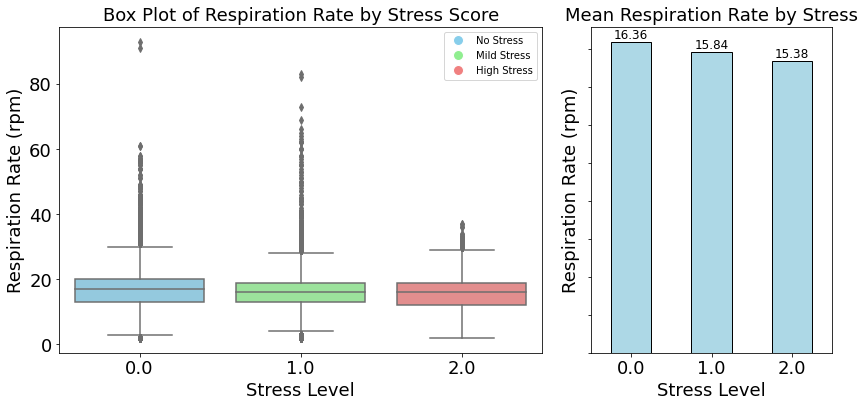

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract 'Respiration Rate (rpm)' and 'Stress_Score' columns
respiration_rate_data = combined_data[['Respiration Rate (rpm)', 'Stress Levels']]

# Calculate average respiration rate for each Stress Score
average_respiration_rate = respiration_rate_data.groupby('Stress Levels')['Respiration Rate (rpm)'].mean()

# Plot box plot and bar chart side by side
fig, (ax_box, ax_bar) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

# Box plot
box_colors = ['skyblue', 'lightgreen', 'lightcoral']
sns.boxplot(x='Stress Levels', y='Respiration Rate (rpm)', data=respiration_rate_data, ax=ax_box, palette=box_colors)
ax_box.set_xlabel('Stress Level', fontsize=18)
ax_box.set_ylabel('Respiration Rate (rpm)', fontsize=18)
ax_box.set_title('Box Plot of Respiration Rate by Stress Score', fontsize=18)

# Create custom legend handles for the box plot
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in box_colors]
ax_box.legend(legend_handles, ['No Stress', 'Mild Stress', 'High Stress'], loc='upper right', fontsize=10)

# Bar chart
bar_color = 'lightblue'
average_respiration_rate.plot(kind='bar', color=bar_color, edgecolor='black', ax=ax_bar)
ax_bar.set_xlabel('Stress Level', fontsize=18)
ax_bar.set_ylabel('Respiration Rate (rpm)', fontsize=18)
ax_bar.set_title('Mean Respiration Rate by Stress', fontsize=18)
ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=0, fontsize=18)  # Rotate x-axis labels
ax_bar.set_yticklabels(ax_bar.get_yticklabels(), fontsize=18)

# Show values on top of the bar chart
for i, v in enumerate(average_respiration_rate):
    ax_bar.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Set fontsize for all elements
plt.rcParams.update({'font.size': 18})

plt.tight_layout()
plt.show()


## Mean Breathing Volume
## Stress Levels

/var/folders/rw/__mb4wmn317bq6zqm1ftt10r0000gn/T/ipykernel_63986/2067791020.py:32: UserWarning:

FixedFormatter should only be used together with FixedLocator



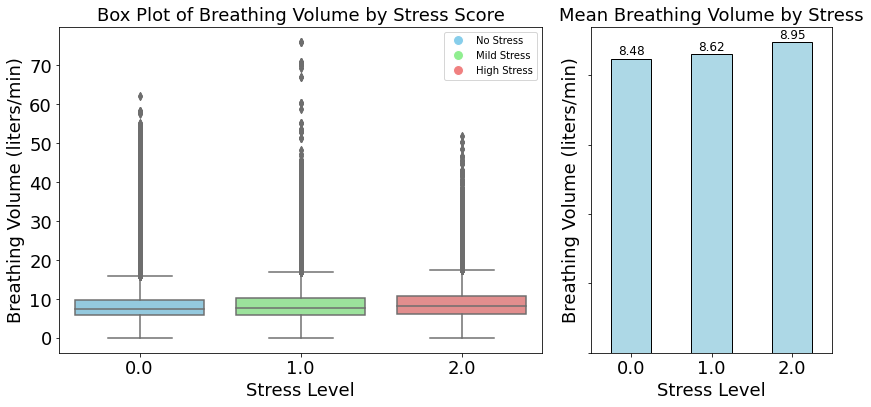

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract 'Respiration Rate (rpm)' and 'Stress_Score' columns
respiration_rate_data = combined_data[['Breathing Volume (liters/min)', 'Stress Levels']]

# Calculate average respiration rate for each Stress Score
average_respiration_rate = respiration_rate_data.groupby('Stress Levels')['Breathing Volume (liters/min)'].mean()

# Plot box plot and bar chart side by side
fig, (ax_box, ax_bar) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 1]})

# Box plot
box_colors = ['skyblue', 'lightgreen', 'lightcoral']
sns.boxplot(x='Stress Levels', y='Breathing Volume (liters/min)', data=respiration_rate_data, ax=ax_box, palette=box_colors)
ax_box.set_xlabel('Stress Level', fontsize=18)
ax_box.set_ylabel('Breathing Volume (liters/min)', fontsize=18)
ax_box.set_title('Box Plot of Breathing Volume by Stress Score', fontsize=18)

# Create custom legend handles for the box plot
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in box_colors]
ax_box.legend(legend_handles, ['No Stress', 'Mild Stress', 'High Stress'], loc='upper right', fontsize=10)

# Bar chart
bar_color = 'lightblue'
average_respiration_rate.plot(kind='bar', color=bar_color, edgecolor='black', ax=ax_bar)
ax_bar.set_xlabel('Stress Level', fontsize=18)
ax_bar.set_ylabel('Breathing Volume (liters/min)', fontsize=18)
ax_bar.set_title('Mean Breathing Volume by Stress', fontsize=18)
ax_bar.set_xticklabels(ax_bar.get_xticklabels(), rotation=0, fontsize=18)  # Rotate x-axis labels
ax_bar.set_yticklabels(ax_bar.get_yticklabels(), fontsize=18)

# Show values on top of the bar chart
for i, v in enumerate(average_respiration_rate):
    ax_bar.text(i, v + 0.02, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Set fontsize for all elements
plt.rcParams.update({'font.size': 18})

plt.tight_layout()
plt.show()


## Smaller Correlation Matrix, with more observations
## Moderater Correlation between breathing volume and activity

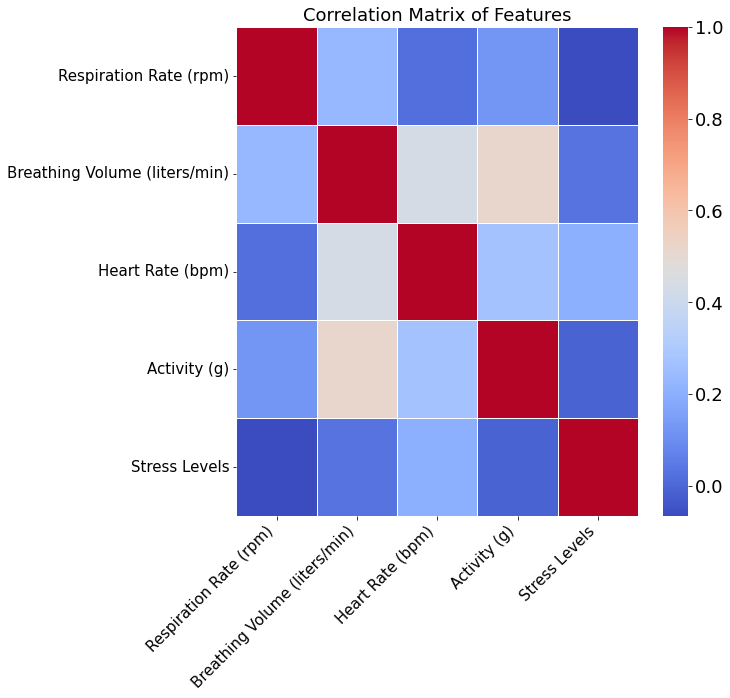

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the desired columns (features) from the combined_data DataFrame
selected_features = combined_data[['Respiration Rate (rpm)',
                                   'Breathing Volume (liters/min)','Heart Rate (bpm)','Activity (g)','Stress Levels']]

# Calculate the correlation matrix
correlation_matrix = selected_features.corr()

# Plot the correlation matrix using a heatmap with slanted x-axis labels
plt.figure(figsize=(9, 9))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, fmt=".2f", annot_kws={'size': 12})
plt.title('Correlation Matrix of Features', fontsize=18)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.yticks(fontsize=15)

plt.show()
